<a href="https://colab.research.google.com/github/r2x4/quick__practice/blob/main/quick_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#af7ac5'>**Practica Base Quick Analista de Datos**</h1>

In [337]:
# importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# <font color='#af7ac5'>**Ver las hojas bases de los datos**</h1>

# <font color='#af7ac5'>**Llamar la base Principal**</h1>

In [338]:
datos_uno = pd.read_csv('/content/base_principal.csv', low_memory=False)
datos_dos = pd.read_csv('/content/base_secundaria.csv')

In [339]:
datos_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ruta                                 15256 non-null  int64  
 1   numero_del_servicio                  15256 non-null  object 
 2   estado                               15256 non-null  object 
 3   creado_por                           15256 non-null  object 
 4   documento_cliente                    15255 non-null  object 
 5   nombre_cliente                       15256 non-null  object 
 6   numero_telefono                      15012 non-null  float64
 7   novedad                              15173 non-null  object 
 8   descripcion_de_novedad               14550 non-null  object 
 9   Ciudad                               15256 non-null  object 
 10  codigo_cedi                          15256 non-null  object 
 11  nombre_cedi                 

In [340]:
columnas_tiempo = [
    'fecha_de_servicio',
    'fecha_cirugia',
    'fecha_de_creacion',
    'tiempo_de_promesa',
    'asignado',
    'aceptado',
    'llegado',
    'reprogramar',
    'cancelado',
    'atendido',
    'finalizado'
]


In [341]:
df_tiempos = datos_uno[columnas_tiempo].copy()

In [342]:
# Asegúrate de excluir 'reprogramar' porque es float64 y está vacía
columnas_a_convertir = [
    'fecha_de_servicio',
    'fecha_cirugia',
    'fecha_de_creacion',
    'tiempo_de_promesa',
    'asignado',
    'aceptado',
    'llegado',
    'cancelado',
    'atendido',
    'finalizado'
]

for col in columnas_a_convertir:
    df_tiempos[col] = pd.to_datetime(df_tiempos[col], errors='coerce', dayfirst=True)


/tmp/ipython-input-342-4066809750.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_tiempos[col] = pd.to_datetime(df_tiempos[col], errors='coerce', dayfirst=True)


In [343]:
datos_uno['finalizado'].dropna().head()

,finalizado
0,20/02/2025 09:13
1,08/03/2025 11:29
2,13/02/2025 08:23
3,12/03/2025 14:45
4,18/02/2025 23:55


In [344]:
formato_fecha_hora = '%d/%m/%Y %H:%M'

for col in columnas_a_convertir:
    df_tiempos[col] = pd.to_datetime(df_tiempos[col], format=formato_fecha_hora, errors='coerce')

In [345]:
df_tiempos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_de_servicio  15256 non-null  datetime64[ns]
 1   fecha_cirugia      11303 non-null  datetime64[ns]
 2   fecha_de_creacion  15256 non-null  datetime64[ns]
 3   tiempo_de_promesa  15256 non-null  datetime64[ns]
 4   asignado           14356 non-null  datetime64[ns]
 5   aceptado           14747 non-null  datetime64[ns]
 6   llegado            14731 non-null  datetime64[ns]
 7   reprogramar        0 non-null      float64       
 8   cancelado          1 non-null      datetime64[ns]
 9   atendido           14752 non-null  datetime64[ns]
 10  finalizado         15170 non-null  datetime64[ns]
dtypes: datetime64[ns](10), float64(1)
memory usage: 1.3 MB


In [346]:
df_tiempos.head(7)

,fecha_de_servicio,fecha_cirugia,fecha_de_creacion,tiempo_de_promesa,asignado,aceptado,llegado,reprogramar,cancelado,atendido,finalizado
0,2025-02-20,NaT,2025-02-20 08:38:00,2019-12-31 23:59:00,2025-02-20 09:08:00,2025-02-20 09:12:00,2025-02-20 09:12:00,NaN,NaT,2025-02-20 09:12:00,2025-02-20 09:13:00
1,2025-03-08,2025-03-08,2025-03-08 10:13:00,2019-12-31 23:59:00,2025-03-08 10:13:00,2025-03-08 10:26:00,2025-03-08 11:23:00,NaN,NaT,2025-03-08 11:23:00,2025-03-08 11:29:00
2,2025-02-13,2025-02-12,2025-02-13 07:27:00,2019-12-31 23:59:00,2025-02-13 07:27:00,2025-02-13 08:12:00,2025-02-13 08:19:00,NaN,NaT,2025-02-13 08:19:00,2025-02-13 08:23:00
3,2025-03-12,2025-03-12,2025-03-12 10:03:00,2019-12-31 23:59:00,2025-03-12 10:43:00,2025-03-12 10:53:00,2025-03-12 11:17:00,NaN,NaT,2025-03-12 14:44:00,2025-03-12 14:45:00
4,2025-02-18,NaT,2025-02-18 11:10:00,2019-12-31 23:59:00,2025-02-18 22:30:00,2025-02-18 22:49:00,2025-02-18 23:53:00,NaN,NaT,2025-02-18 23:53:00,2025-02-18 23:55:00
5,2025-02-03,2025-02-03,2025-02-03 13:20:00,2019-12-31 23:59:00,2025-02-03 13:20:00,2025-02-03 14:15:00,2025-02-03 14:48:00,NaN,NaT,2025-02-03 14:48:00,2025-02-03 14:49:00
6,2025-02-11,2025-02-11,2025-02-11 08:11:00,2019-12-31 23:59:00,NaT,2025-02-11 08:55:00,2025-02-11 10:21:00,NaN,NaT,2025-02-11 10:51:00,2025-02-11 11:11:00


In [347]:
df_tiempos.isna().sum()

,0
fecha_de_servicio,0
fecha_cirugia,3953
fecha_de_creacion,0
tiempo_de_promesa,0
asignado,900
aceptado,509
llegado,525
reprogramar,15256
cancelado,15255
atendido,504


In [348]:
df_tiempos.isna().mean() * 100

,0
fecha_de_servicio,0.000000
fecha_cirugia,25.911117
fecha_de_creacion,0.000000
tiempo_de_promesa,0.000000
asignado,5.899318
aceptado,3.336392
llegado,3.441269
reprogramar,100.000000
cancelado,99.993445
atendido,3.303618


In [349]:
# Lista de columnas tipo fecha que quieres limpiar
columnas_fecha = ['fecha_de_servicio', 'fecha_cirugia', 'fecha_de_creacion']

# Limpiar: separar por '|', tomar la primera parte y convertir a fecha
for col in columnas_fecha:
    df_tiempos[col] = df_tiempos[col].astype(str).str.split('|').str[0]
    df_tiempos[col] = pd.to_datetime(df_tiempos[col], errors='coerce')

In [350]:
df_tiempos['duracion_total'] = df_tiempos['finalizado'] - df_tiempos['asignado']

In [351]:
df_tiempos['tiempo_desplazamiento'] = df_tiempos['llegado'] - df_tiempos['asignado']

In [352]:
df_tiempos['tiempo_atencion'] = df_tiempos['finalizado'] - df_tiempos['llegado']

In [353]:
filtro = df_tiempos['duracion_total'] > pd.Timedelta(minutes=60)
casos_largos = df_tiempos[filtro]

In [354]:
df_tiempos['tiempo_atencion_min'] = df_tiempos['tiempo_atencion'].dt.total_seconds() / 60
duracion_promedio = df_tiempos['tiempo_atencion_min'].mean()
print(f'Duración promedio de atención: {duracion_promedio:.2f} minutos')

Duración promedio de atención: 37.95 minutos


In [355]:
# Duración total: desde asignado hasta finalizado
df_tiempos['duracion_total'] = df_tiempos['finalizado'] - df_tiempos['asignado']

# Tiempo de desplazamiento: desde asignado hasta llegado
df_tiempos['tiempo_desplazamiento'] = df_tiempos['llegado'] - df_tiempos['asignado']

# Tiempo de atención: desde llegado hasta finalizado
df_tiempos['tiempo_atencion'] = df_tiempos['finalizado'] - df_tiempos['llegado']


In [356]:
df_tiempos['duracion_total_min'] = df_tiempos['duracion_total'].dt.total_seconds() / 60
df_tiempos['tiempo_desplazamiento_min'] = df_tiempos['tiempo_desplazamiento'].dt.total_seconds() / 60
df_tiempos['tiempo_atencion_min'] = df_tiempos['tiempo_atencion'].dt.total_seconds() / 60

In [357]:
# Tiempo desde la creación hasta la finalización
df_tiempos['tiempo_total_creacion_final'] = df_tiempos['finalizado'] - df_tiempos['fecha_de_creacion']

# Convertir a horas
df_tiempos['tiempo_total_creacion_final_hrs'] = df_tiempos['tiempo_total_creacion_final'].dt.total_seconds() / 3600

# Evaluar si cumple la promesa (menos de 23:59)
promesa_max = pd.to_timedelta("23:59:00")
df_tiempos['cumple_promesa'] = df_tiempos['tiempo_total_creacion_final'] <= promesa_max

In [358]:
df_tiempos['cumple_promesa'].value_counts(normalize=True) * 100

,proportion
cumple_promesa,
True,95.785265
False,4.214735


In [359]:
# Estilo general
sns.set(style='whitegrid')

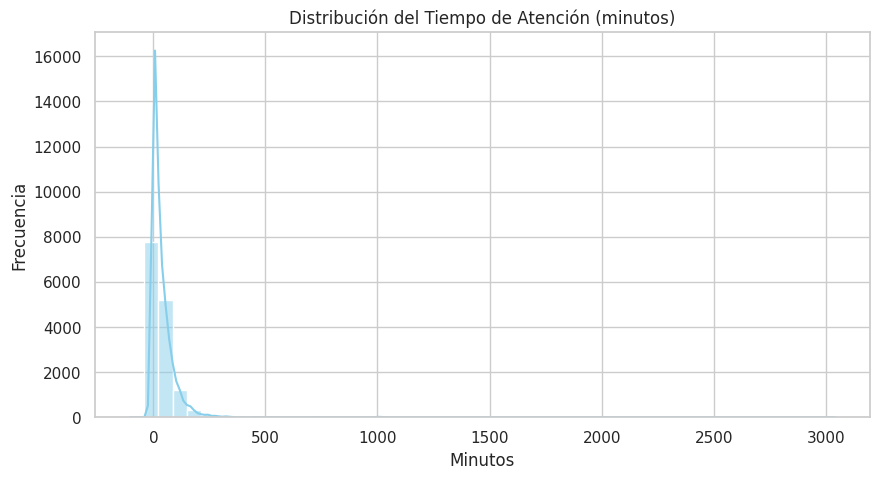

In [360]:
plt.figure(figsize=(10, 5))
sns.histplot(df_tiempos['tiempo_atencion_min'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribución del Tiempo de Atención (minutos)')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()

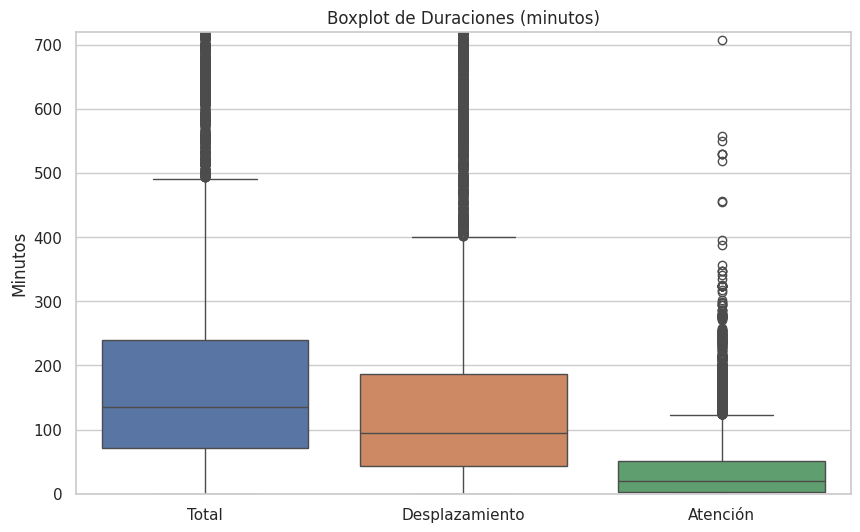

In [361]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tiempos[['duracion_total_min', 'tiempo_desplazamiento_min', 'tiempo_atencion_min']])
plt.title('Boxplot de Duraciones (minutos)')
plt.ylabel('Minutos')
plt.xticks([0, 1, 2], ['Total', 'Desplazamiento', 'Atención'])
plt.ylim(0, 720)  # Ajusta según tu necesidad
plt.show()

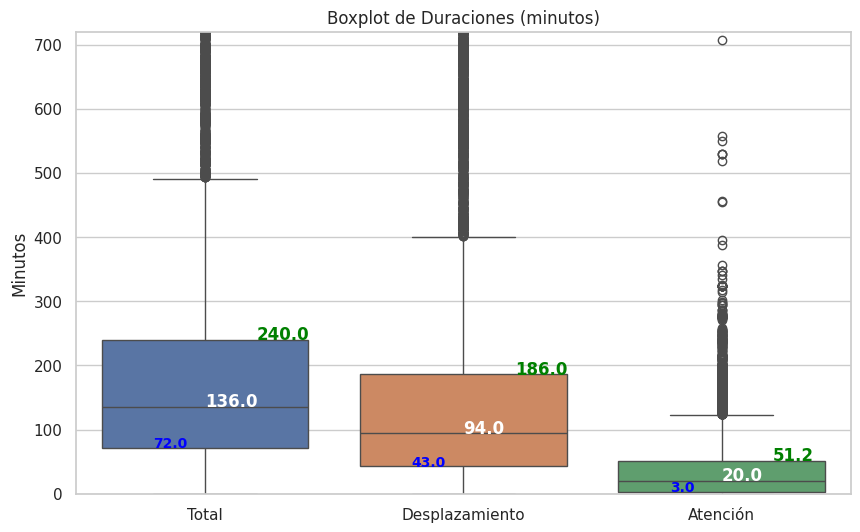

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos que quieres mostrar
columnas = ['duracion_total_min', 'tiempo_desplazamiento_min', 'tiempo_atencion_min']
etiquetas = ['Total', 'Desplazamiento', 'Atención']

# Crea el boxplot
plt.figure(figsize=(10, 6))
box = sns.boxplot(data=df_tiempos[columnas])
plt.title('Boxplot de Duraciones (minutos)')
plt.ylabel('Minutos')
plt.xticks([0, 1, 2], etiquetas)
plt.ylim(0, 720)  # Límites si quieres acotar a 12 horas

# Añade los valores de los cuartiles
for i, col in enumerate(columnas):
    q1 = df_tiempos[col].quantile(0.25)
    q2 = df_tiempos[col].quantile(0.5)  # mediana
    q3 = df_tiempos[col].quantile(0.75)

    plt.text(i - 0.2, q1, f'{q1:.1f}', color='blue', fontsize=10, weight='bold')
    plt.text(i,     q2, f'{q2:.1f}', color='white', fontsize=12, weight='bold')
    plt.text(i + 0.2, q3, f'{q3:.1f}', color='green', fontsize=12, weight='bold')

# Muestra el gráfico

plt.show()



In [363]:
df_tiempos.head(7)

,fecha_de_servicio,fecha_cirugia,fecha_de_creacion,tiempo_de_promesa,asignado,aceptado,llegado,reprogramar,cancelado,atendido,finalizado,duracion_total,tiempo_desplazamiento,tiempo_atencion,tiempo_atencion_min,duracion_total_min,tiempo_desplazamiento_min,tiempo_total_creacion_final,tiempo_total_creacion_final_hrs,cumple_promesa
0,2025-02-20,NaT,2025-02-20 08:38:00,2019-12-31 23:59:00,2025-02-20 09:08:00,2025-02-20 09:12:00,2025-02-20 09:12:00,NaN,NaT,2025-02-20 09:12:00,2025-02-20 09:13:00,0 days 00:05:00,0 days 00:04:00,0 days 00:01:00,1.0,5.0,4.0,0 days 00:35:00,0.583333,True
1,2025-03-08,2025-03-08,2025-03-08 10:13:00,2019-12-31 23:59:00,2025-03-08 10:13:00,2025-03-08 10:26:00,2025-03-08 11:23:00,NaN,NaT,2025-03-08 11:23:00,2025-03-08 11:29:00,0 days 01:16:00,0 days 01:10:00,0 days 00:06:00,6.0,76.0,70.0,0 days 01:16:00,1.266667,True
2,2025-02-13,2025-02-12,2025-02-13 07:27:00,2019-12-31 23:59:00,2025-02-13 07:27:00,2025-02-13 08:12:00,2025-02-13 08:19:00,NaN,NaT,2025-02-13 08:19:00,2025-02-13 08:23:00,0 days 00:56:00,0 days 00:52:00,0 days 00:04:00,4.0,56.0,52.0,0 days 00:56:00,0.933333,True
3,2025-03-12,2025-03-12,2025-03-12 10:03:00,2019-12-31 23:59:00,2025-03-12 10:43:00,2025-03-12 10:53:00,2025-03-12 11:17:00,NaN,NaT,2025-03-12 14:44:00,2025-03-12 14:45:00,0 days 04:02:00,0 days 00:34:00,0 days 03:28:00,208.0,242.0,34.0,0 days 04:42:00,4.700000,True
4,2025-02-18,NaT,2025-02-18 11:10:00,2019-12-31 23:59:00,2025-02-18 22:30:00,2025-02-18 22:49:00,2025-02-18 23:53:00,NaN,NaT,2025-02-18 23:53:00,2025-02-18 23:55:00,0 days 01:25:00,0 days 01:23:00,0 days 00:02:00,2.0,85.0,83.0,0 days 12:45:00,12.750000,True
5,2025-02-03,2025-02-03,2025-02-03 13:20:00,2019-12-31 23:59:00,2025-02-03 13:20:00,2025-02-03 14:15:00,2025-02-03 14:48:00,NaN,NaT,2025-02-03 14:48:00,2025-02-03 14:49:00,0 days 01:29:00,0 days 01:28:00,0 days 00:01:00,1.0,89.0,88.0,0 days 01:29:00,1.483333,True
6,2025-02-11,2025-02-11,2025-02-11 08:11:00,2019-12-31 23:59:00,NaT,2025-02-11 08:55:00,2025-02-11 10:21:00,NaN,NaT,2025-02-11 10:51:00,2025-02-11 11:11:00,NaT,NaT,0 days 00:50:00,50.0,NaN,NaN,0 days 03:00:00,3.000000,True


In [365]:
# Asegurarnos de que las columnas sean datetime
df_tiempos['fecha_de_creacion'] = pd.to_datetime(df_tiempos['fecha_de_creacion'], errors='coerce')
df_tiempos['finalizado'] = pd.to_datetime(df_tiempos['finalizado'], errors='coerce')

# Calcular diferencia
df_tiempos['tiempo_real'] = df_tiempos['finalizado'] - df_tiempos['fecha_de_creacion']

# Convertir a horas y comparar con 23:59
df_tiempos['cumplimiento_promesa'] = df_tiempos['tiempo_real'] <= pd.Timedelta(hours=23, minutes=59)


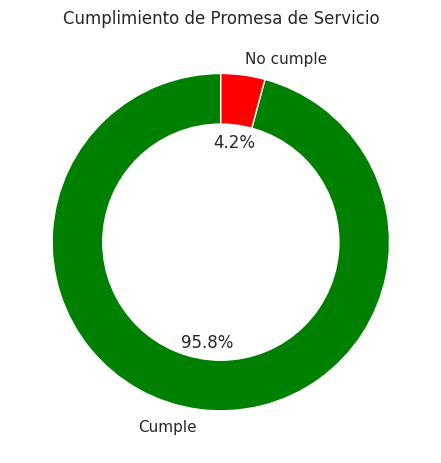

In [366]:
import matplotlib.pyplot as plt

# Contar los valores True y False
cumplimiento_counts = df_tiempos['cumplimiento_promesa'].value_counts()

# Etiquetas y colores
labels = ['Cumple', 'No cumple']
colors = ['green', 'red']

# Gráfico de rosquilla
fig, ax = plt.subplots()
ax.pie(cumplimiento_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})

# Añadir círculo blanco en el centro
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Cumplimiento de Promesa de Servicio')
plt.tight_layout()
plt.show()


In [367]:
df_tiempos['cumplimiento_promesa'] = df_tiempos['cumplimiento_promesa'].replace({True: 'Cumplió', False: 'No cumplió'})

In [368]:
df_tiempos.head(7)

,fecha_de_servicio,fecha_cirugia,fecha_de_creacion,tiempo_de_promesa,asignado,aceptado,llegado,reprogramar,cancelado,atendido,...,tiempo_desplazamiento,tiempo_atencion,tiempo_atencion_min,duracion_total_min,tiempo_desplazamiento_min,tiempo_total_creacion_final,tiempo_total_creacion_final_hrs,cumple_promesa,tiempo_real,cumplimiento_promesa
0,2025-02-20,NaT,2025-02-20 08:38:00,2019-12-31 23:59:00,2025-02-20 09:08:00,2025-02-20 09:12:00,2025-02-20 09:12:00,NaN,NaT,2025-02-20 09:12:00,...,0 days 00:04:00,0 days 00:01:00,1.0,5.0,4.0,0 days 00:35:00,0.583333,True,0 days 00:35:00,Cumplió
1,2025-03-08,2025-03-08,2025-03-08 10:13:00,2019-12-31 23:59:00,2025-03-08 10:13:00,2025-03-08 10:26:00,2025-03-08 11:23:00,NaN,NaT,2025-03-08 11:23:00,...,0 days 01:10:00,0 days 00:06:00,6.0,76.0,70.0,0 days 01:16:00,1.266667,True,0 days 01:16:00,Cumplió
2,2025-02-13,2025-02-12,2025-02-13 07:27:00,2019-12-31 23:59:00,2025-02-13 07:27:00,2025-02-13 08:12:00,2025-02-13 08:19:00,NaN,NaT,2025-02-13 08:19:00,...,0 days 00:52:00,0 days 00:04:00,4.0,56.0,52.0,0 days 00:56:00,0.933333,True,0 days 00:56:00,Cumplió
3,2025-03-12,2025-03-12,2025-03-12 10:03:00,2019-12-31 23:59:00,2025-03-12 10:43:00,2025-03-12 10:53:00,2025-03-12 11:17:00,NaN,NaT,2025-03-12 14:44:00,...,0 days 00:34:00,0 days 03:28:00,208.0,242.0,34.0,0 days 04:42:00,4.700000,True,0 days 04:42:00,Cumplió
4,2025-02-18,NaT,2025-02-18 11:10:00,2019-12-31 23:59:00,2025-02-18 22:30:00,2025-02-18 22:49:00,2025-02-18 23:53:00,NaN,NaT,2025-02-18 23:53:00,...,0 days 01:23:00,0 days 00:02:00,2.0,85.0,83.0,0 days 12:45:00,12.750000,True,0 days 12:45:00,Cumplió
5,2025-02-03,2025-02-03,2025-02-03 13:20:00,2019-12-31 23:59:00,2025-02-03 13:20:00,2025-02-03 14:15:00,2025-02-03 14:48:00,NaN,NaT,2025-02-03 14:48:00,...,0 days 01:28:00,0 days 00:01:00,1.0,89.0,88.0,0 days 01:29:00,1.483333,True,0 days 01:29:00,Cumplió
6,2025-02-11,2025-02-11,2025-02-11 08:11:00,2019-12-31 23:59:00,NaT,2025-02-11 08:55:00,2025-02-11 10:21:00,NaN,NaT,2025-02-11 10:51:00,...,NaT,0 days 00:50:00,50.0,NaN,NaN,0 days 03:00:00,3.000000,True,0 days 03:00:00,Cumplió


In [370]:
df_tiempos.to_csv('df_tiempos_limpio.csv', index=False)
